In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../Datasets/Telco-Customer-Churn.csv')

In [2]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

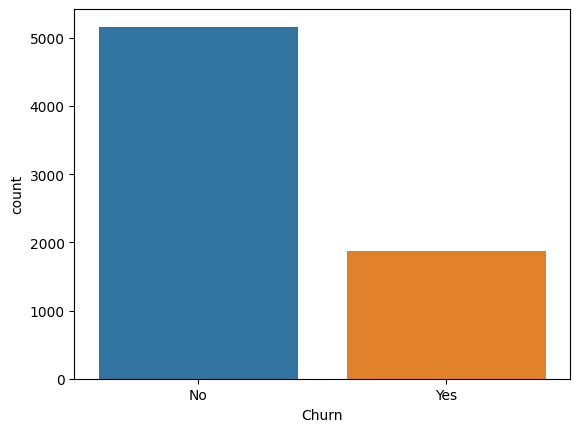

In [6]:
sns.countplot(x='Churn'  , data=data , hue='Churn')

<Axes: xlabel='tenure', ylabel='Count'>

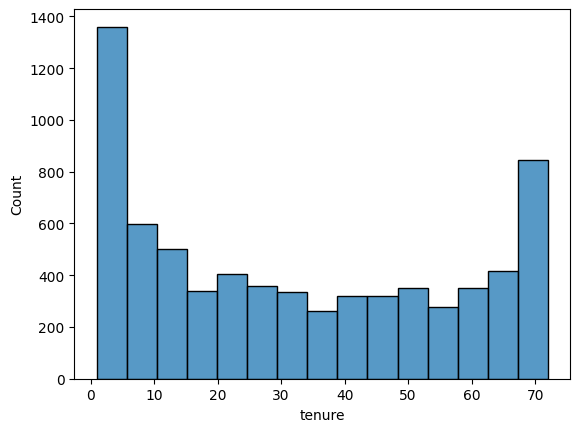

In [7]:
sns.histplot(data=data , x='tenure')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

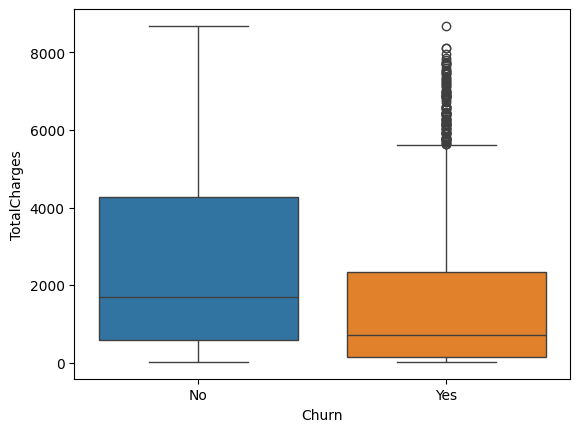

In [8]:
sns.boxplot(x='Churn' , y='TotalCharges' , data=data , hue='Churn')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

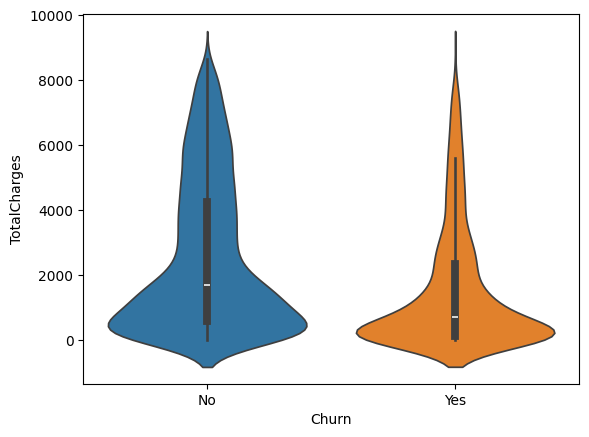

In [9]:
sns.violinplot(x='Churn' , y='TotalCharges' , data=data , hue='Churn')

<Axes: xlabel='Contract', ylabel='TotalCharges'>

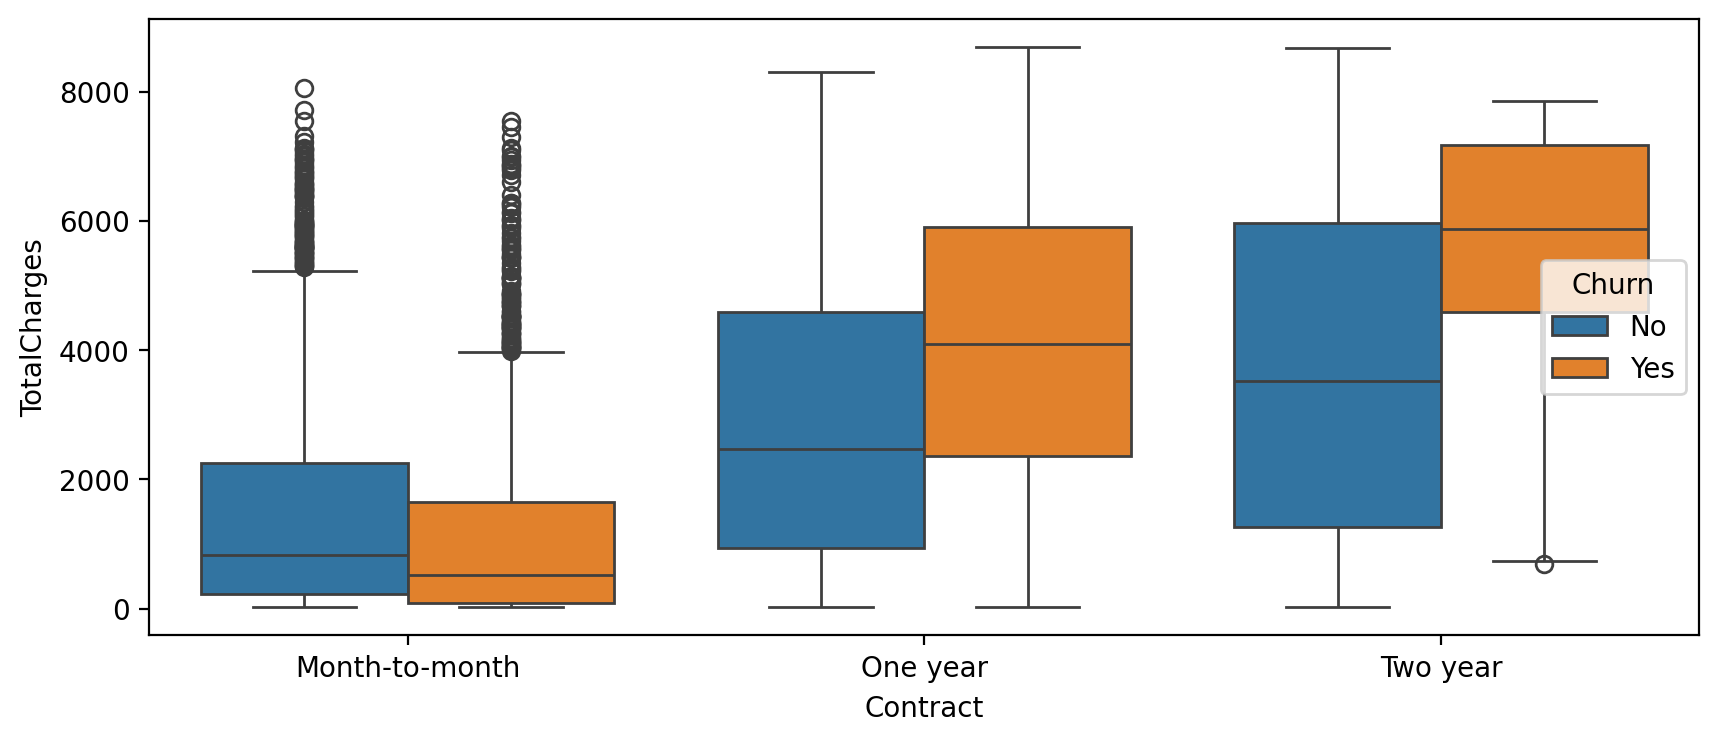

In [10]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=data , x='Contract' , y='TotalCharges' , hue='Churn') 

In [11]:
Cat_cols = data.select_dtypes('object').columns

In [12]:
corr_data  = pd.get_dummies(data[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [13]:
corr_data['Churn_Yes'].sort_values(ascending=False)[1:-1]

Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
gender_Female                              0.008545
gender_Male                               -0.008545
PhoneService

In [14]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

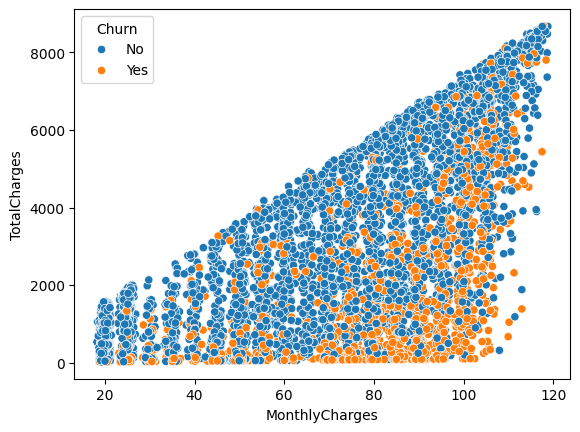

In [15]:
sns.scatterplot(data=data , x='MonthlyCharges' , y='TotalCharges' , hue='Churn')

In [16]:
yes_churn = data.groupby(['Churn' , 'tenure']).count().transpose()['Yes']
no_churn = data.groupby(['Churn' , 'tenure']).count().transpose()['No']

In [17]:
churn_rate = yes_churn / (no_churn+yes_churn) * 100

In [18]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

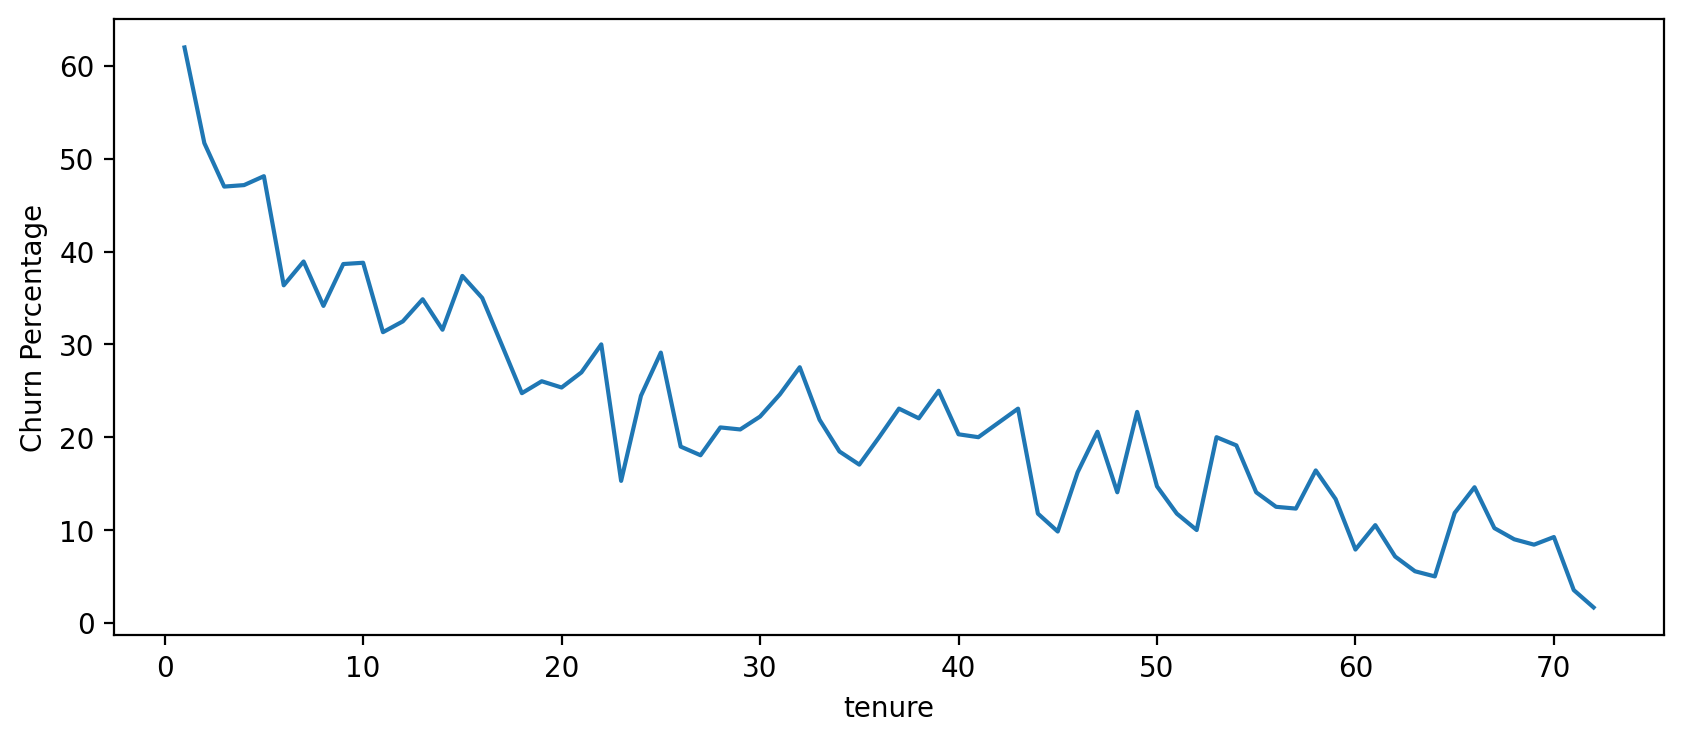

In [19]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

In [20]:
""" Function to seprate tenure groups """
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

data['Tenure Cohort'] = data['tenure'].apply(cohort)

In [21]:
data.head()[['tenure' , 'Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

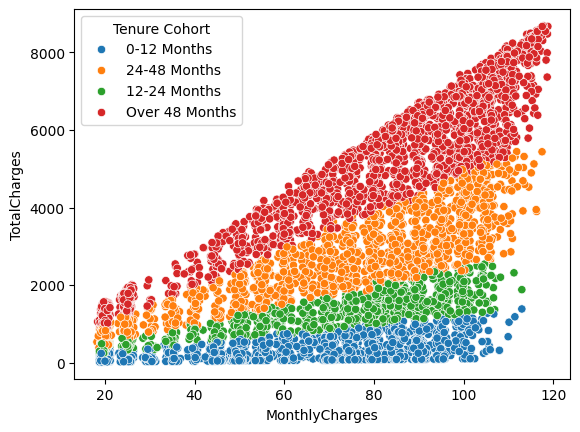

In [22]:
sns.scatterplot(data=data , x='MonthlyCharges' , y='TotalCharges' , hue='Tenure Cohort')

<Axes: xlabel='Tenure Cohort', ylabel='count'>

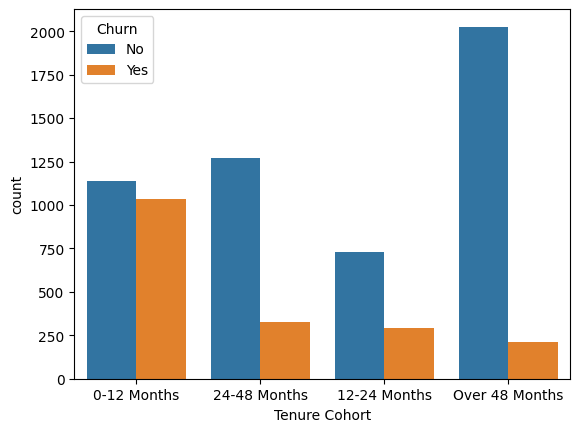

In [23]:
sns.countplot(data=data , x='Tenure Cohort' , hue='Churn')

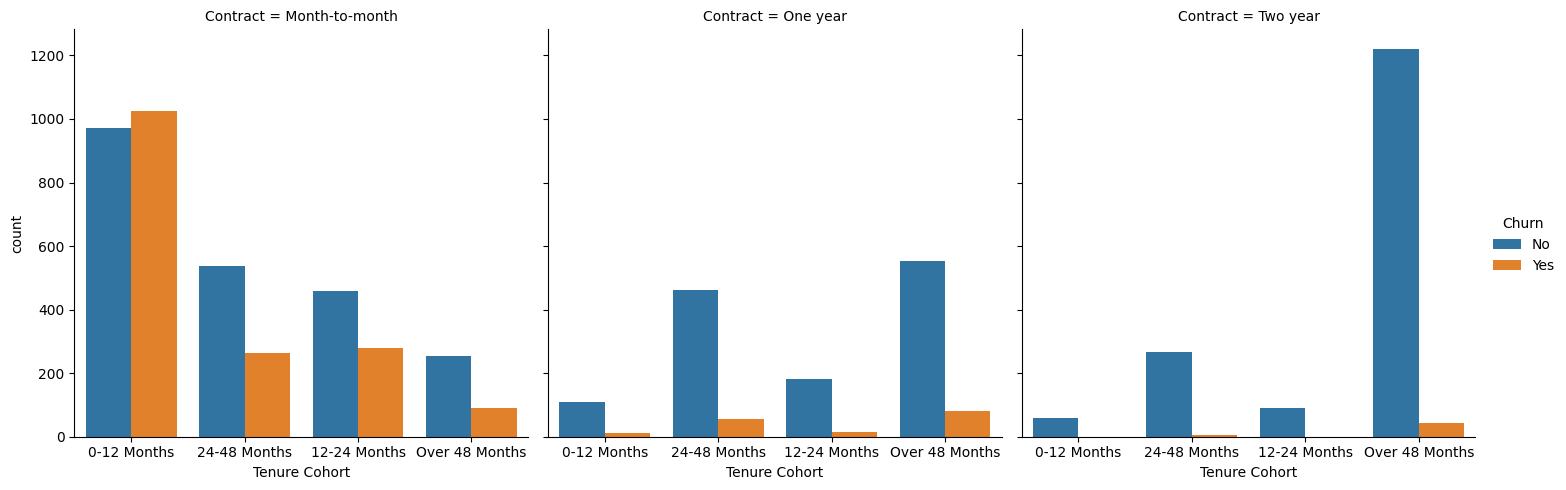

In [24]:
sns.catplot(data=data , x='Tenure Cohort' , col='Contract' , hue='Churn' , kind='count')

In [25]:
X = pd.get_dummies(data.drop(['Churn' , 'customerID'] , axis=1) , drop_first=True)
y = data['Churn']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=101)

In [27]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=5)

Classification Report : 
               precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



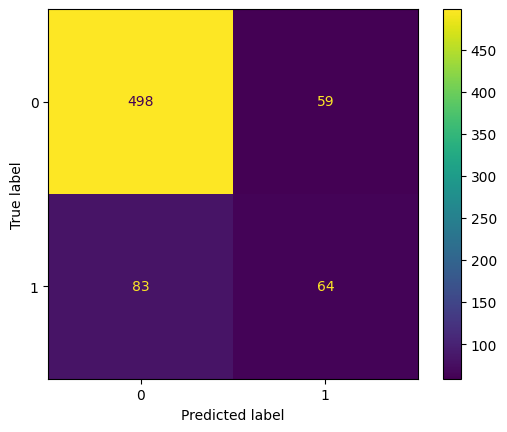

In [28]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay , confusion_matrix

preds = model.predict(X_test)

print("Classification Report : \n" , classification_report(y_test , preds))
con_mat = ConfusionMatrixDisplay(confusion_matrix(y_test , preds))
con_mat.plot()

C:\Users\mohit\AppData\Local\Temp\ipykernel_10344\3724832734.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_features.sort_values('Feature Importance'),x=imp_features.sort_values('Feature Importance').index,y='Feature Importance' , palette='husl')


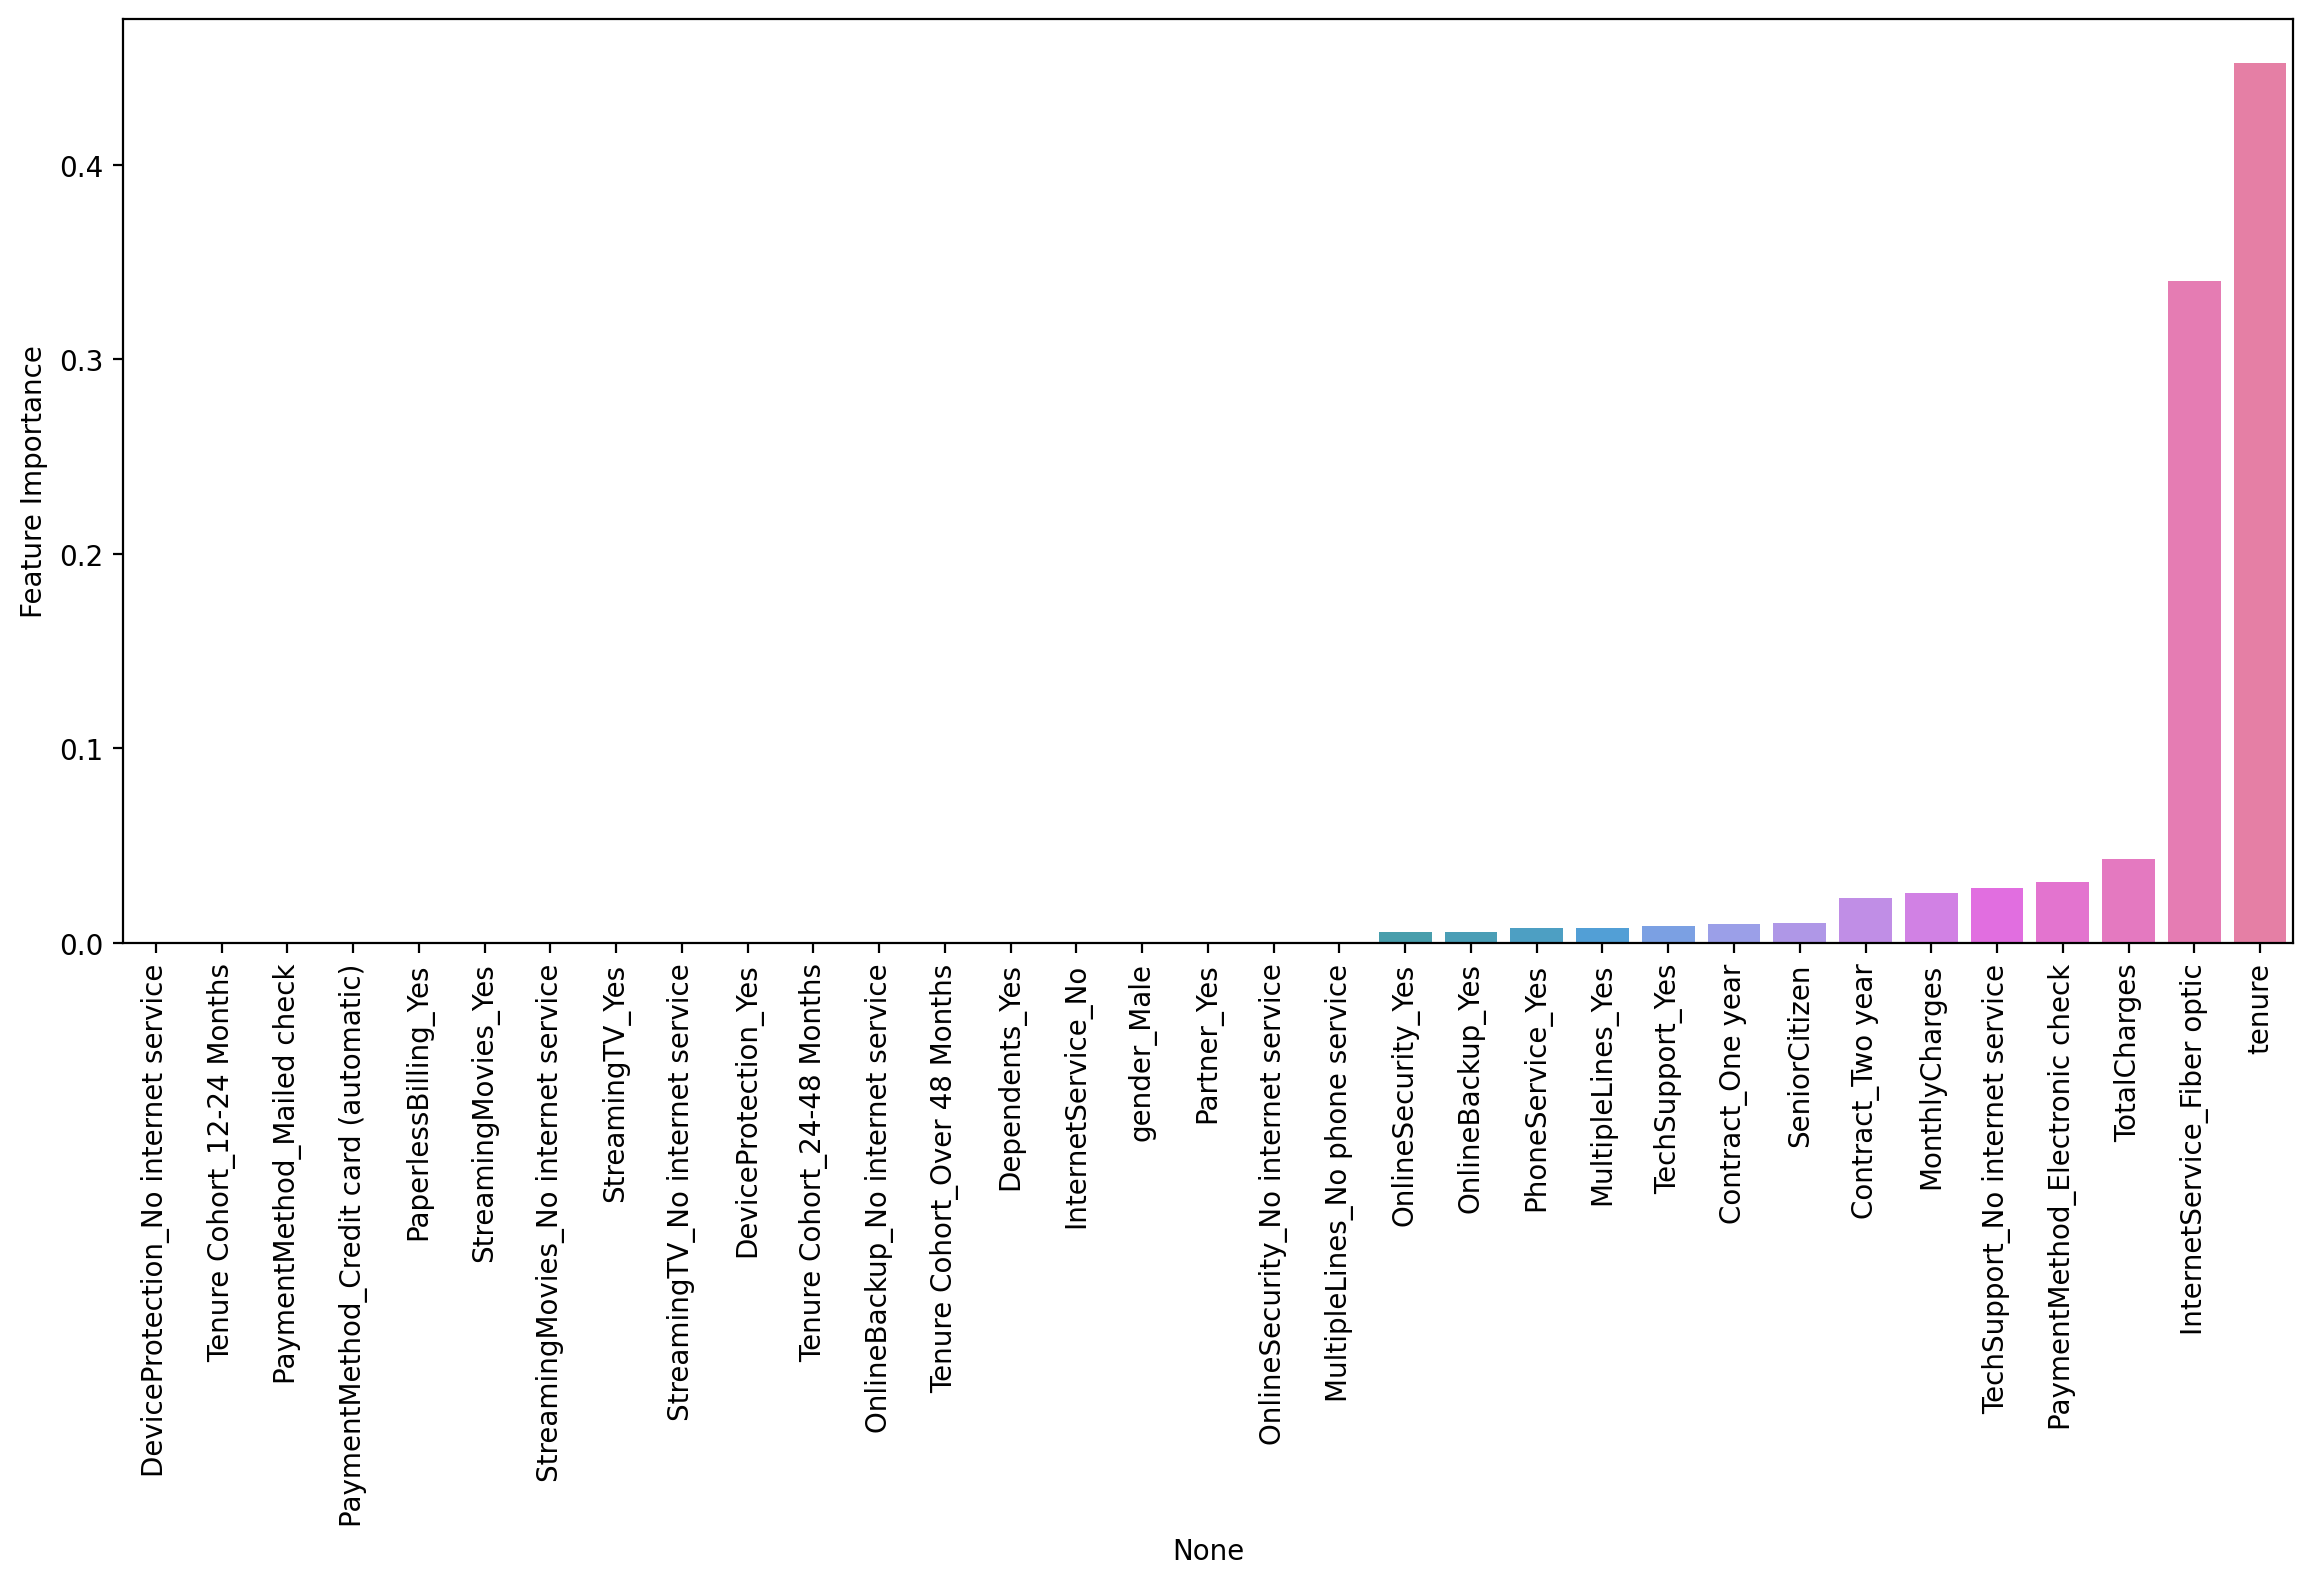

In [31]:
from seaborn import palplot


imp_features = pd.DataFrame(data=model.feature_importances_ , index=X.columns , columns=['Feature Importance'])

plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_features.sort_values('Feature Importance'),x=imp_features.sort_values('Feature Importance').index,y='Feature Importance' , palette='husl')
plt.xticks(rotation=90);

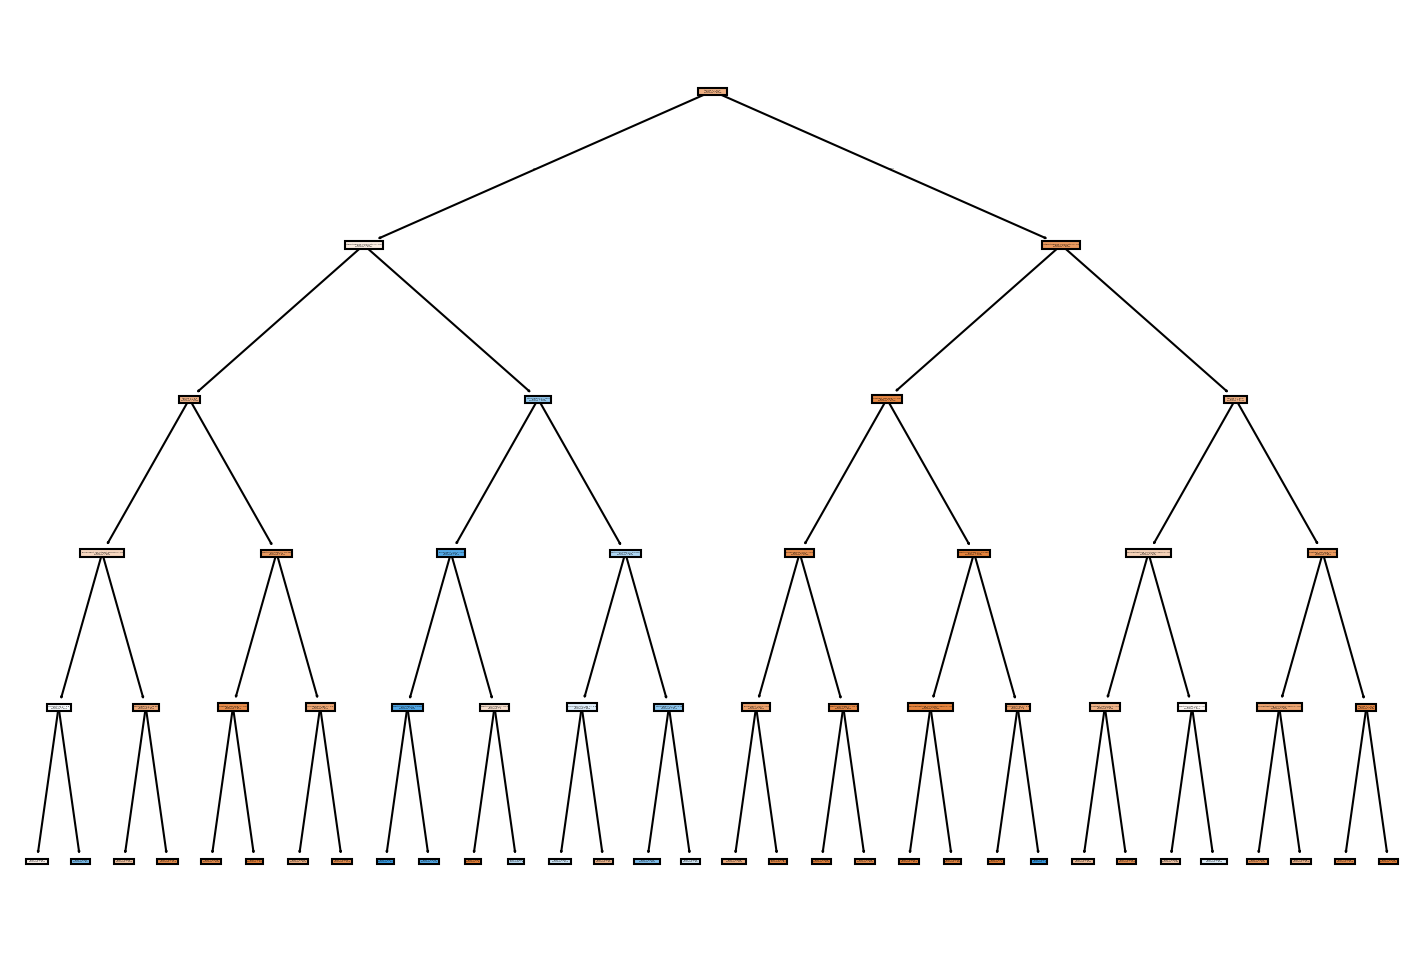

In [33]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train , y_train)

RandomForestClassifier()

Classification Report : 
               precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.51      0.47      0.49       147

    accuracy                           0.80       704
   macro avg       0.69      0.68      0.68       704
weighted avg       0.79      0.80      0.79       704



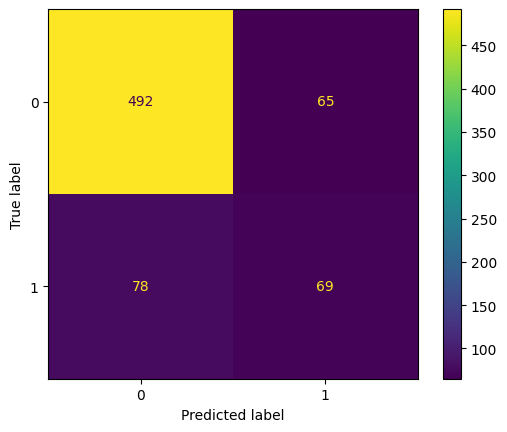

In [35]:
preds = model.predict(X_test)

print("Classification Report : \n" , classification_report(y_test , preds))
con_mat = ConfusionMatrixDisplay(confusion_matrix(y_test , preds))
con_mat.plot()

In [36]:
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier

model = AdaBoostClassifier()
model.fit(X_train , y_train)

c:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

Classification Report : 
               precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



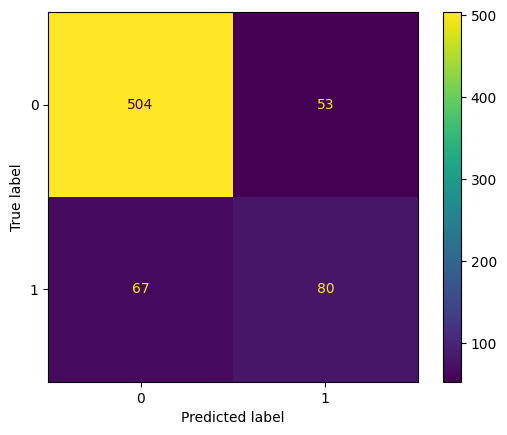

In [37]:
preds = model.predict(X_test)

print("Classification Report : \n" , classification_report(y_test , preds))
con_mat = ConfusionMatrixDisplay(confusion_matrix(y_test , preds))
con_mat.plot()

In [38]:
model = GradientBoostingClassifier()
model.fit(X_train , y_train)

GradientBoostingClassifier()

Classification Report : 
               precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



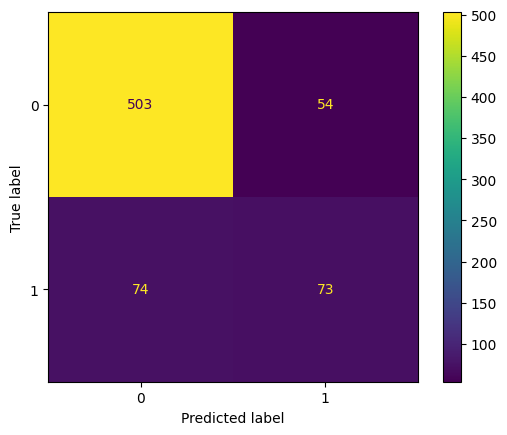

In [39]:
preds = model.predict(X_test)

print("Classification Report : \n" , classification_report(y_test , preds))
con_mat = ConfusionMatrixDisplay(confusion_matrix(y_test , preds))
con_mat.plot()